<a href="https://colab.research.google.com/github/Jadoeltea/prediksi-batu-ginjal/blob/main/UAS_ML1_231352002_Irfan_Zulkarnaen_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irfan Zulkarnaen<br>
NIM  : 231352002<br>
Kelas : Malam A<br>

# New Section

- Import Dataset di Kaggle

In [26]:
import os
import json

kaggle_json = {
    "username": "jadoeltea",
    "key": "e4829efe858500918d02c29ecf585080"
}

kaggle_dir = '/root/.kaggle'
kaggle_file = 'kaggle.json'
kaggle_path = os.path.join(kaggle_dir, kaggle_file)

if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)


with open(kaggle_path, 'w') as file:
    json.dump(kaggle_json, file)

os.chmod(kaggle_path, 0o600)



In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d mansoordaku/ckdisease

cp: cannot stat 'kaggle.json': No such file or directory
kaggle.json
  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 26.8MB/s]


In [28]:
!unzip ckdisease.zip

Archive:  ckdisease.zip
  inflating: kidney_disease.csv      


- Import Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pickle


- Data Discovery

In [30]:
data = pd.read_csv('kidney_disease.csv')
data.sample()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
206,206,60.0,70.0,1.01,1.0,0.0,NaN,normal,notpresent,notpresent,...,41,NaN,NaN,yes,no,no,good,no,no,ckd


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [32]:
data = data.drop(['id'], axis=1)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [34]:
numerical = []
catgcols = []

for col in data.columns:
  if data[col].dtype=="float64":
    numerical.append(col)
  else:
      catgcols.append(col)

for col in data.columns:
     if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
     else:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [35]:
numerical

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [36]:
catgcols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

- Explorary Data Analisis (EDA)

In [37]:
fig = px.scatter(data,
    x = data['age'], y = data['dm'],
    color="classification")
fig.update_layout(title='Pola Sebaran Penderita Penyakit Ginjal Kronis (CKD) Berdasarkan Usia Dengan Diabetes Melitus (DM)')
fig.show()



In [38]:
fig = px.scatter(data,
    x = data['age'], y = data['htn'],
    color="classification")
fig.update_layout(title='Pola Sebaran Penderita Penyakit Ginjal Kronis (CKD) Berdasarkan Usia Dengan Hypertensiom (htn)')
fig.show()


In [39]:
fig = px.scatter(data,
    x = data['age'], y = data['ane'],
    color="classification")
fig.update_layout(title='Pola Sebaran Penderita Penyakit Ginjal Kronis (CKD) Berdasarkan Usia Dengan Anemia (ane)')
fig.show()

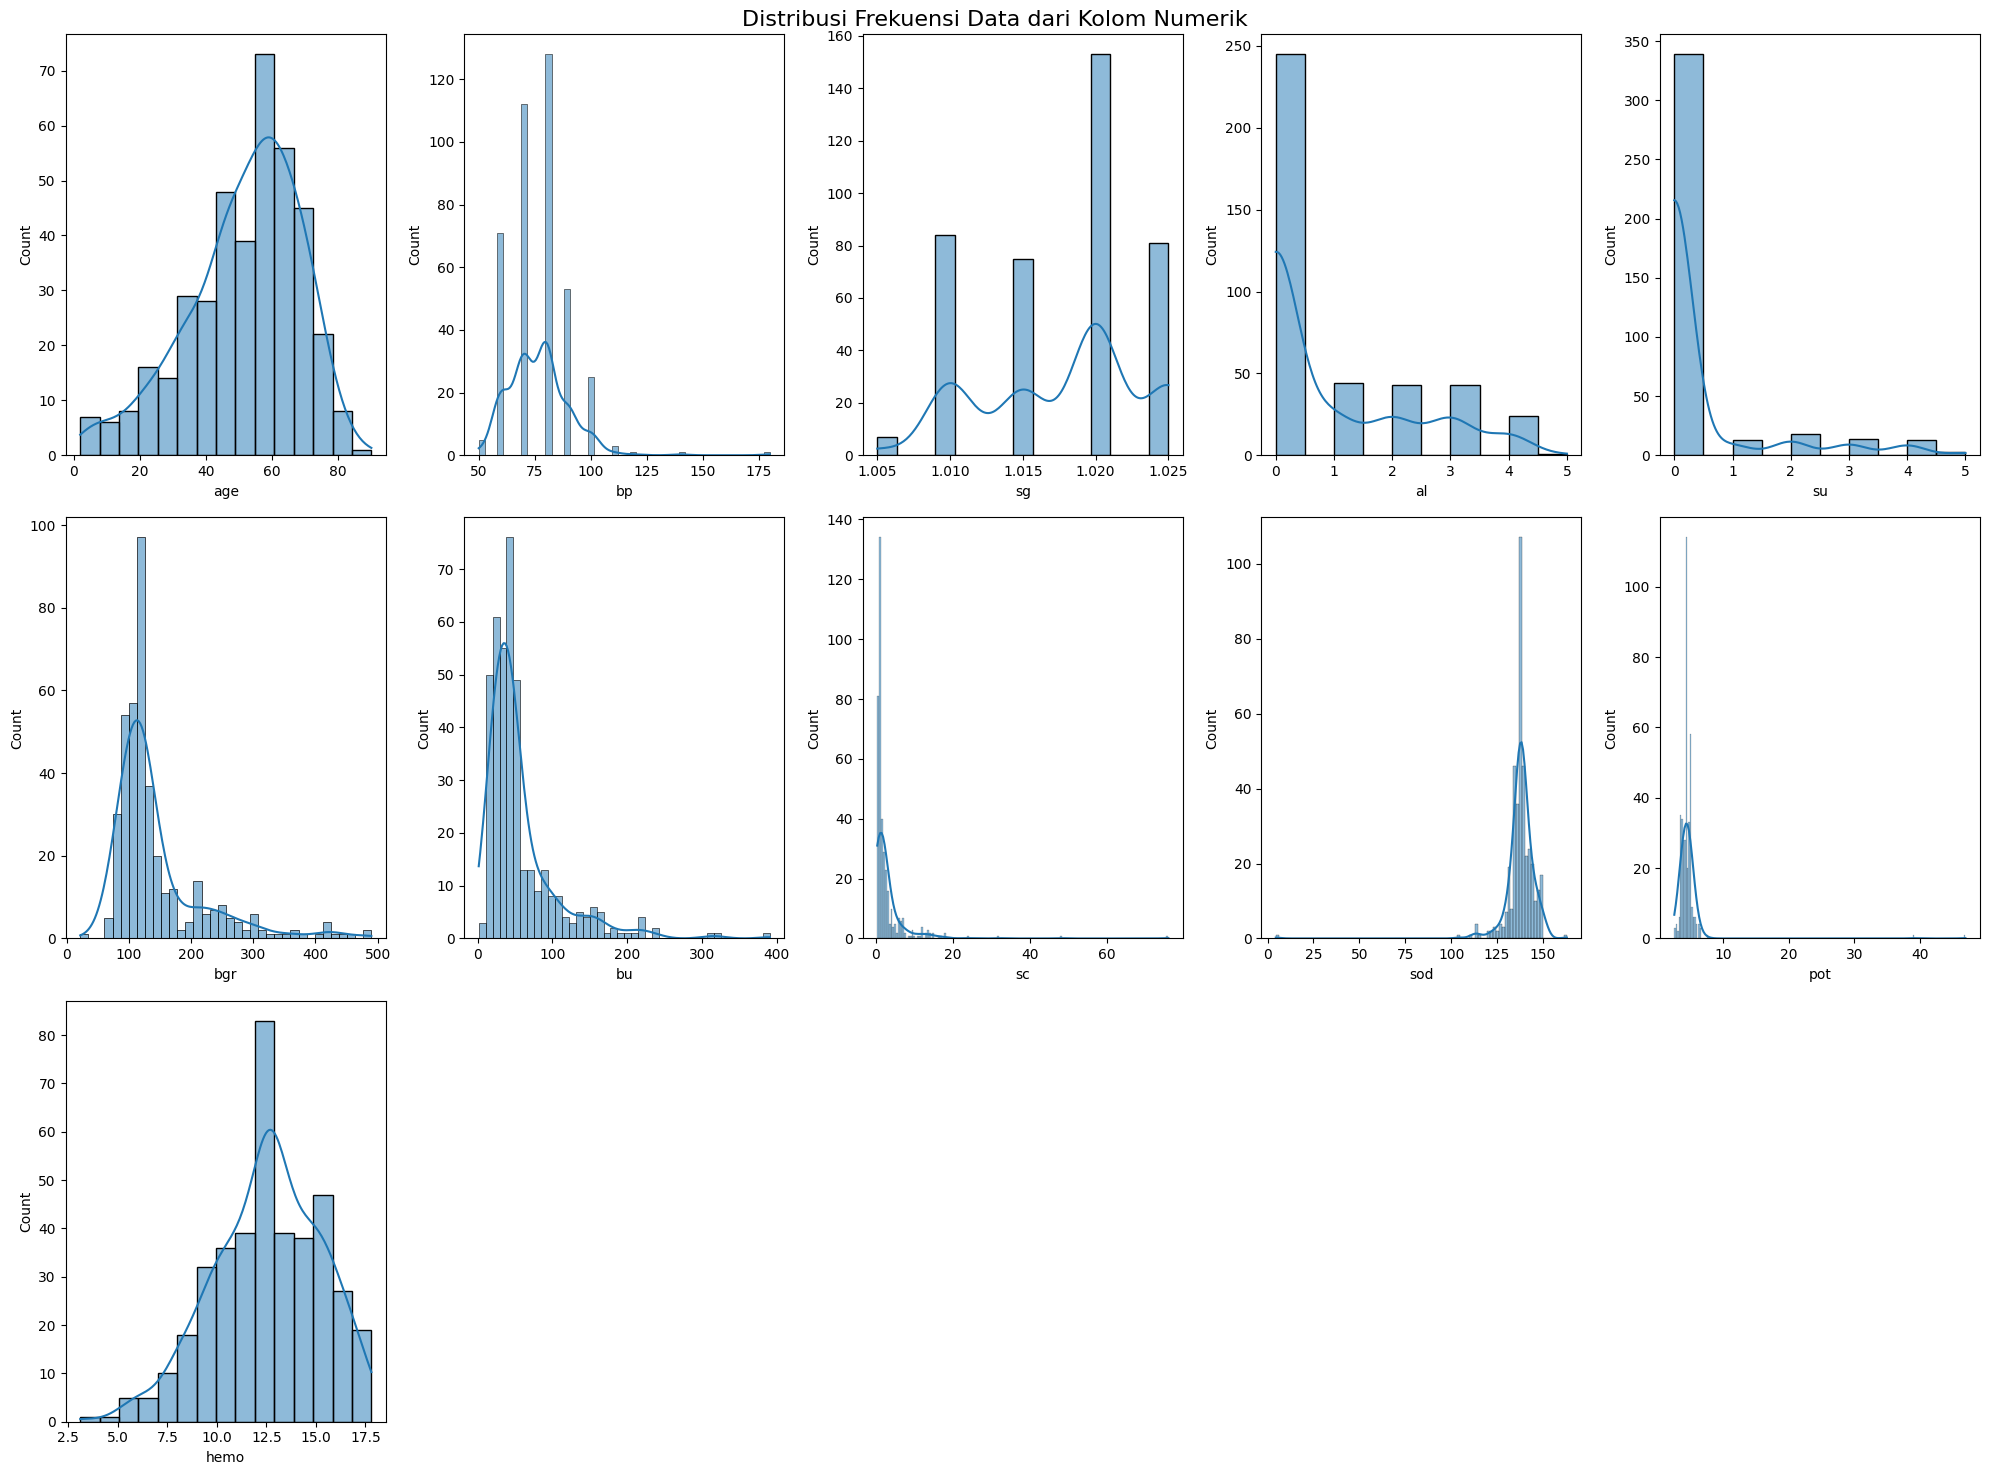

In [40]:
#distribusi frekuensi dari kolom numerik
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in numerical:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column)

    plotnumber += 1
plt.suptitle('Distribusi Frekuensi Data dari Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.show()

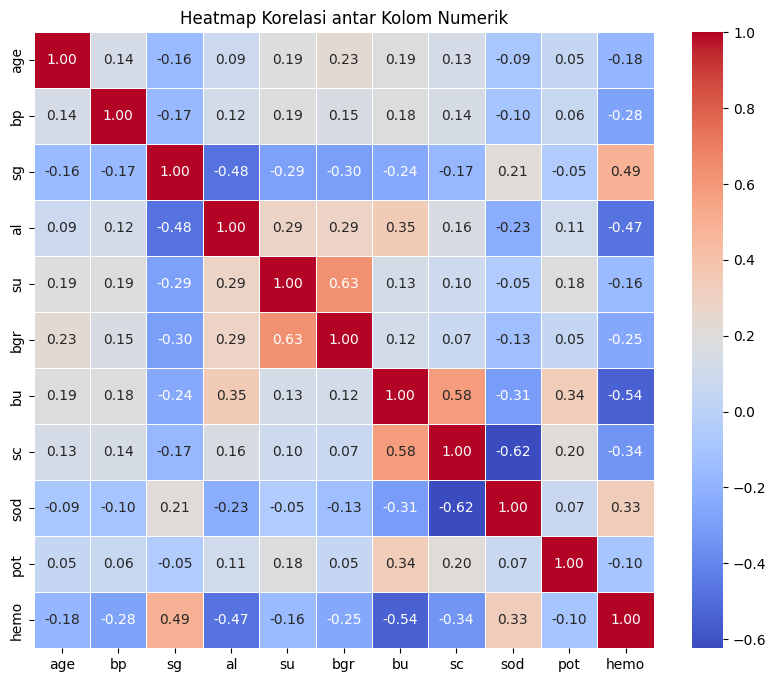

In [41]:
numeric_columns = data.select_dtypes(include=['float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom Numerik')
plt.show()


<ipython-input-42-f96d43957042>:9: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



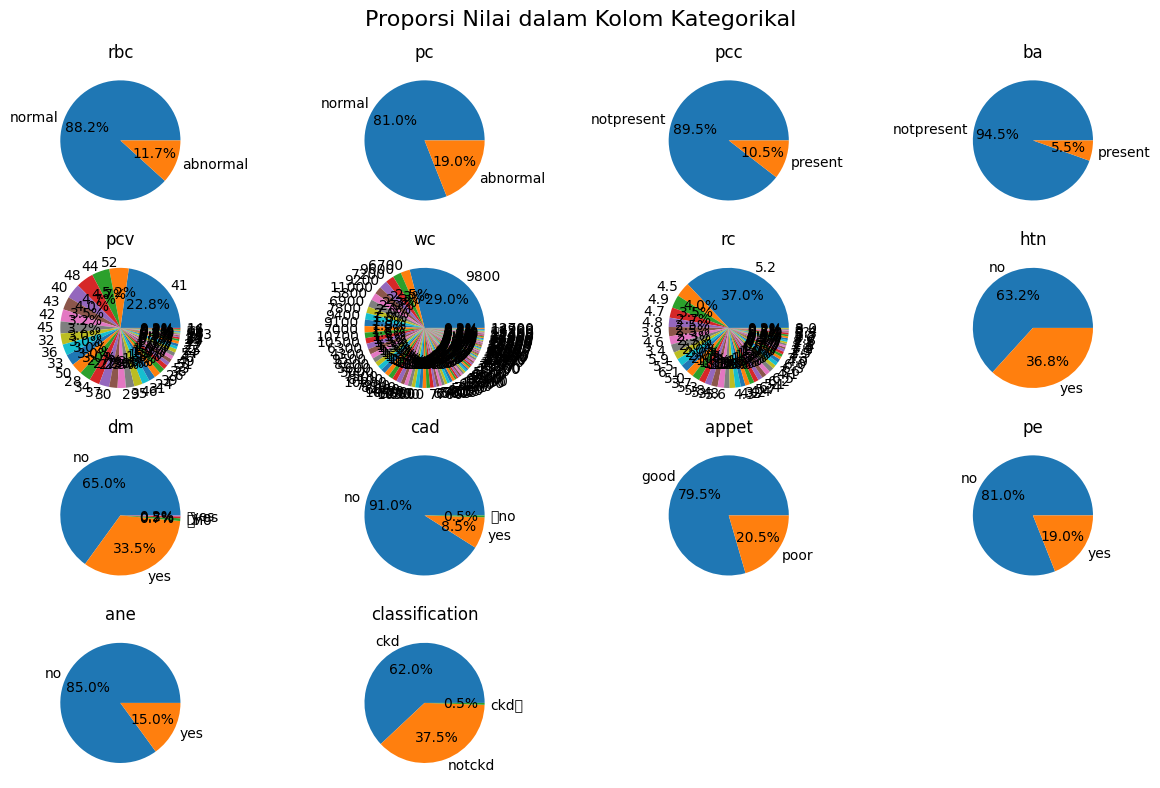

In [42]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(catgcols, 1):
    plt.subplot(4, 4, i)
    value_counts = data[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(column)
plt.suptitle('Proporsi Nilai dalam Kolom Kategorikal', fontsize=16)
plt.tight_layout()
plt.show()

- Data Preprocesing

In [43]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [44]:
data['classification'] =data ['classification'].replace(['ckd\t'],'ckd')

In [45]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [46]:
#memisahkan features dan label
ind_col = [col for col in data.columns if col != 'classification']
dep_col = 'classification'

In [47]:
data[dep_col].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [48]:
#merubah dataset semua menjadi numerikal
le = LabelEncoder()
for col in catgcols:
  data[col] = le.fit_transform(data[col])

In [49]:
data['classification'] = le.fit_transform(data['classification'])

In [50]:
#identifikasi data label dan features
x = data[ind_col]
y = data[dep_col]

In [51]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,34,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,34,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,0


In [52]:
data.to_csv('kidney-disease.csv')

- Modelling

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [54]:
dtc = DecisionTreeClassifier (
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
    )

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}")
confusion = confusion_matrix (y_test, dtc.predict(x_test))

tn, fp, fn, tp = confusion.ravel()
print (f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.99375
akurasi data testing = 1.0 

confusion matrix : 
[[52  0]
 [ 0 28]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



- Visualisasi hasil Algoritma ID3 / Pohon Keputusan

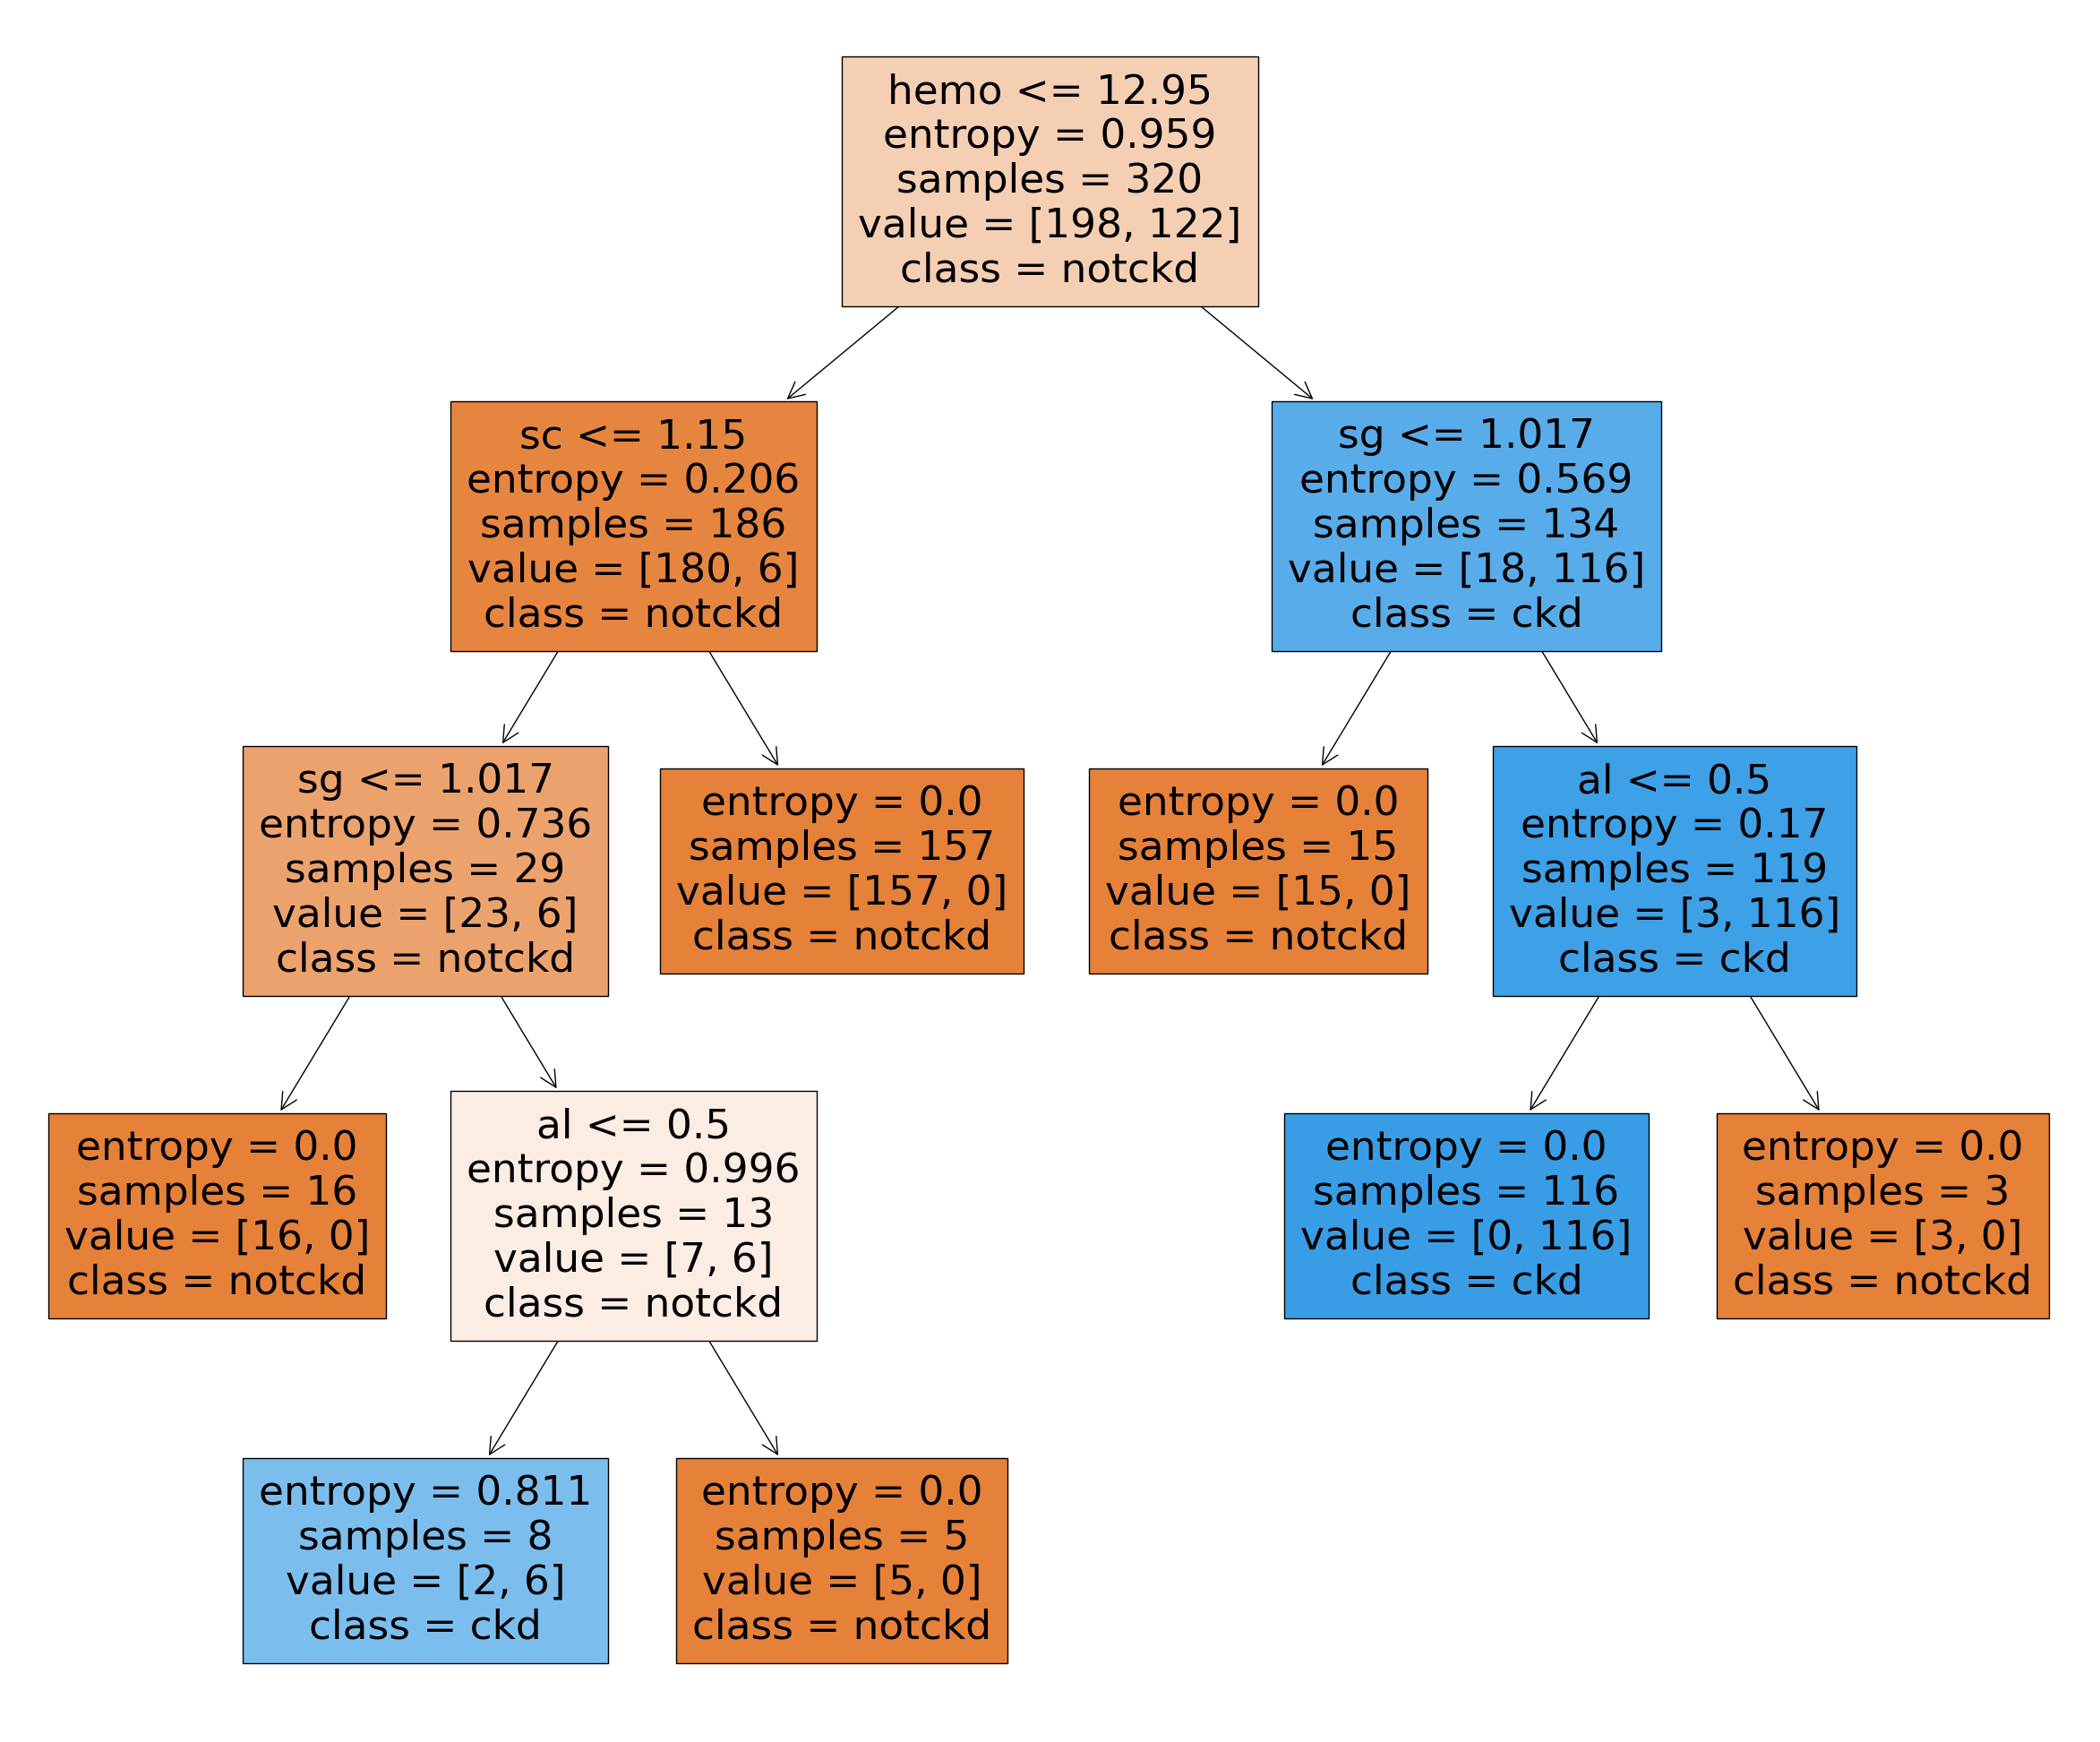

In [55]:
fig = plt.figure(figsize=(30,25))
_= tree.plot_tree(model,
                 feature_names=ind_col,
                 class_names=['notckd','ckd'],
                 filled=True)

In [56]:
input_data = (68.0,70.0,1.005,1.0,0.0,0,0,1,0,121.0,28.0,1.4,138.0,4.4,12.9,26,90,34,0,3, 2, 0, 0,0)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Melakukan prediksi dengan model yang sudah diinisiasi sebelumnya
prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('Pasien Tidak Terkena Batu Ginjal')
else:
    print('Pasien Terkena Batu Ginjal')


[0]
Pasien Tidak Terkena Batu Ginjal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



- Simpan Model

In [57]:
filename = 'kidney-disease.sav'
pickle.dump(dtc, open(filename,'wb'))